<div class="alert alert-block alert-info">
<b>Mini Projet l
    a partie 2</b> 
</div>

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
<b>Lecture de fichier Json</b> 
</div>

In [4]:
df=pd.read_json('Clustering_Model_result.json')

<div class="alert alert-block alert-info">
<b>Lecture de fichier Xlsx</b> 
</div>

In [5]:
mydf=pd.read_excel('LRFMP1P2IT.xlsx')

In [6]:
mydf

,Customer_ID,Frequence,Recence,Longueur,Montant,NbrP1,NbrP2,Inter_achat
0,1,1,1,0,69,1,0,41.573700
1,2,1,3,0,350,1,0,41.573700
2,3,1,4,0,69,1,0,41.573700
3,4,1,6,0,120,1,0,41.573700
4,5,1,6,0,120,1,0,41.573700
...,...,...,...,...,...,...,...,...
1712,1713,3,394,260,1464,2,1,130.000000
1713,1714,5,59,22,951,5,0,5.500000
1714,1715,12,405,399,2616,6,6,36.272727
1715,1716,5,155,44,2888,5,0,11.000000


In [7]:
df

,Customer_ID,Frequency,Recency,Length,Monetary,Cluster
0,1,-1.185691,-2.011266,-1.219013,-0.988066,cluster_5
1,2,-1.185691,-1.996520,-1.219013,-0.888919,cluster_5
2,3,-1.185691,-1.989147,-1.219013,-0.988066,cluster_5
3,4,-1.185691,-1.974402,-1.219013,-0.970071,cluster_5
4,5,-1.185691,-1.974402,-1.219013,-0.970071,cluster_5
...,...,...,...,...,...,...
1712,1713,-0.814494,0.886274,0.996309,-0.495858,cluster_2
1713,1714,-0.443296,-1.583639,-1.031562,-0.676864,cluster_5
1714,1715,0.855894,0.967375,2.180654,-0.089390,cluster_1
1715,1716,-0.443296,-0.875843,-0.844112,0.006581,cluster_0


<div class="alert alert-block alert-info">
<b>Merge Data</b> 
</div>

In [8]:
mydf = pd.merge(mydf, df[['Customer_ID','Cluster']],on='Customer_ID')

<div class="alert alert-block alert-info">
<b>Calcule de by Cluster</b> 
</div>

In [9]:
newdta=mydf.groupby(['Cluster']).agg(Nbr_client=('Customer_ID','count'),
                                     MeanL=('Longueur','mean'),
                                     MeanR=('Recence','mean'),
                                     MeanF=('Frequence','mean'),
                                     MeanM=('Montant','mean')
                                     
                                    )

In [16]:
newdta['pattern']=(newdta['MeanL']>mydf['Longueur'].mean()).astype('i').astype('str')+(newdta['MeanR']>mydf['Recence'].mean()).astype('i').astype('str')+(newdta['MeanF']>mydf['Frequence'].mean()).astype('i').astype('str')+(newdta['MeanM']>mydf['Montant'].mean()).astype('i').astype('str')

In [11]:
newdta['MeanL'].mean()

152.89974005632158

In [18]:
newdta

,Nbr_client,MeanL,MeanR,MeanF,MeanM,pattern
Cluster,,,,,,
cluster_0,262,93.820611,162.339695,7.419847,2644.549618,0010
cluster_1,189,289.227513,379.830688,12.788360,4212.687831,1111
cluster_2,339,271.362832,377.206490,5.147493,1723.233038,1100
cluster_3,250,81.100000,378.832000,4.172000,1449.260000,0100
cluster_4,138,210.717391,378.637681,15.014493,10454.202899,1111
cluster_5,377,23.063660,83.185676,2.610080,891.283820,0000
cluster_6,162,101.006173,306.092593,15.314815,4397.617284,0111


<div class="alert alert-block alert-success">
<b>Interpretation des résultat</b>
</div>

<div class="alert alert-block alert-warning">
<br>Cluster_0 0010:  Clients récent, et acheté plus d’une fois.</br> 
<br>Cluster_1 1111:  des anciens A acheté récemment, achète souvent et dépense le plus. </br> 
<br>Cluster_2 1100:  Ce sont des anciens client A acheté récemment mais n’achète pas souvent qui n’a pas dépensé beaucoup.</br>
<br>cluster_3 0100:  des nouveau client qui A acheté récemment mais n’achète pas souvent qui n’a pas dépensé beaucoup.</br>
<br>cluster_4 1111:  des anciens A acheté récemment, achète souvent et dépense le plus.</br> 
<br>cluster_5 0000:  Clients récent, mais il n'a pas fait aucun interaction avec les articles.</br> 
<br>cluster_6 0111:  des nouveux client qui ont active et interessé au par le site web</br> 
    
</div>


<div class="alert alert-block alert-info">
<b>Nombre de clients par Cluster</b> 
</div>

<BarContainer object of 7 artists>

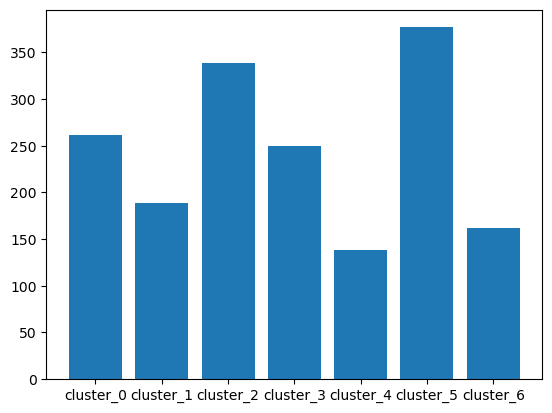

In [189]:
plt.bar(newdta.index,newdta['Nbr_client'])

<div class="alert alert-block alert-info">
<b>Nombre de transaction par Cluster</b> 
</div>

In [190]:
sum_achat=mydf.groupby(mydf['Cluster'])[['NbrP2','NbrP1']].agg('sum')
sum_achat

,NbrP2,NbrP1
Cluster,,
cluster_0,65,1882
cluster_1,1207,1215
cluster_2,858,892
cluster_3,950,95
cluster_4,1381,695
cluster_5,1,983
cluster_6,1458,1033


In [191]:
sum_achat=sum_achat['NbrP1']+sum_achat['NbrP2']

In [192]:
sum_achat


Cluster
cluster_0    1947
cluster_1    2422
cluster_2    1750
cluster_3    1045
cluster_4    2076
cluster_5     984
cluster_6    2491
dtype: int64

<BarContainer object of 7 artists>

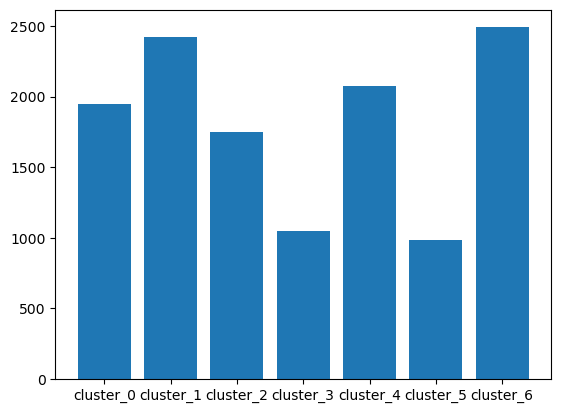

In [193]:
plt.bar(sum_achat.index,sum_achat)

<div class="alert alert-block alert-info">
<b>Total dépensé par Cluster</b> 
</div>

<BarContainer object of 7 artists>

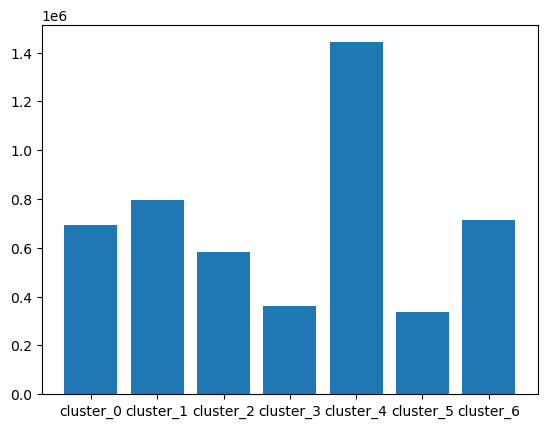

In [194]:
plt.bar(sum_achat.index,mydf.groupby(mydf['Cluster'])['Montant'].agg('sum'))

<div class="alert alert-block alert-info">
<b>Panier moyen par Cluster</b> 
</div>

In [195]:
chiffre=mydf.groupby(mydf['Cluster']).agg(Panier_moyen=('Montant','sum'))

<BarContainer object of 7 artists>

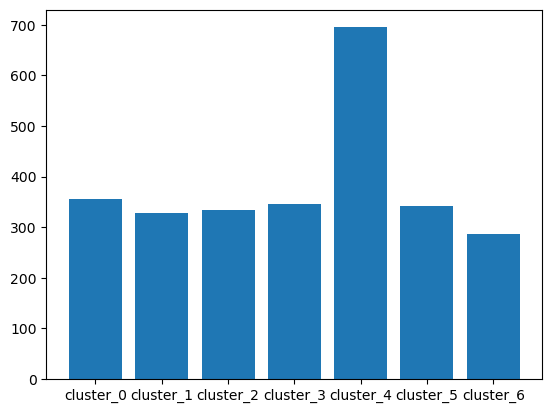

In [196]:
plt.bar(chiffre.index,(chiffre['Panier_moyen']/sum_achat))

In [197]:
sum_achat

Cluster
cluster_0    1947
cluster_1    2422
cluster_2    1750
cluster_3    1045
cluster_4    2076
cluster_5     984
cluster_6    2491
dtype: int64

In [198]:
chiffre

,Panier_moyen
Cluster,
cluster_0,692872
cluster_1,796198
cluster_2,584176
cluster_3,362315
cluster_4,1442680
cluster_5,336014
cluster_6,712414
